In [1]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Life cycle of Machine learning Project


*   Understanding the Problem Statement
*   Data Collection
*   Data Checks to perform
*   Exploratory data analysis
*   Data Pre-Processing
*   Model Training
*   Choose best model


# 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
# 2) Data Collection
Dataset has been taken from Kaggle.
Link to the dataset: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

#3) Data Checks


*   Missing Values
*   Duplicates
*   Data Types
*   No. of unique values in each of the columns
*   Statistics of the dataset
*   Categories in categorical features








3.1 Missing Values

In [17]:
df.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


There are no missing values in the dataset

Duplicates


In [40]:
df.duplicated().sum() # no duplicates

0

Datatypes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Unqiue value count

In [18]:
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


Dataset statistics

In [19]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Observations:

1.   No outliers are there as such. This can easily be said because the mean and median values for respective columns are very close to each other.
2.   Means of the columns are close to each other (between 66-69) and standard deviations are also very close (between 14.6-15.19).
1.   There is a minimum score of 0 in math while reading and writing have minimum scores of 17 and 10.




#Data Exploration

In [20]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [25]:
for feature in df.columns:
  print(feature, "--> ",df[feature].unique())

gender -->  ['female' 'male']
race/ethnicity -->  ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education -->  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch -->  ['standard' 'free/reduced']
test preparation course -->  ['none' 'completed']
math score -->  [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading score -->  [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writing 

In [29]:
#categorical and numerical features
categorical_features = df.select_dtypes(include = 'object').columns.to_list()
numerical_features = df.select_dtypes(include = 'int64').columns.to_list()

In [31]:
print("Categorical Features: ",categorical_features)
print("Numerical Features: ",numerical_features)

Categorical Features:  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
Numerical Features:  ['math score', 'reading score', 'writing score']


In [32]:
#adding total score and average score columns

df['total_score'] = df['math score']+df['reading score']+df['writing score']
df['average'] = df['total_score']/3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [36]:
#students with full marks
reading_full = df[df['reading score']==100]['average'].count()
writing_full = df[df['writing score']==100]['average'].count()
math_full = df[df['math score']==100]['average'].count()


print("no. of students with full marks in math: ", math_full)
print("no. of students with full writing in math: ", writing_full)
print("no. of students with full reading in math: ", reading_full)


no. of students with full marks in math:  7
no. of students with full writing in math:  14
no. of students with full reading in math:  17


In [37]:
#students with less than 20 marks
reading_full = df[df['reading score']<=20]['average'].count()
writing_full = df[df['writing score']<=20]['average'].count()
math_full = df[df['math score']<=20]['average'].count()


print("no. of students with full marks in math: ", math_full)
print("no. of students with full writing in math: ", writing_full)
print("no. of students with full reading in math: ", reading_full)

no. of students with full marks in math:  4
no. of students with full writing in math:  3
no. of students with full reading in math:  1


we can say that more students have passed in reading than maths. Overall performance in reading is seen better than maths


#Visualisation

<Axes: xlabel='average', ylabel='Count'>

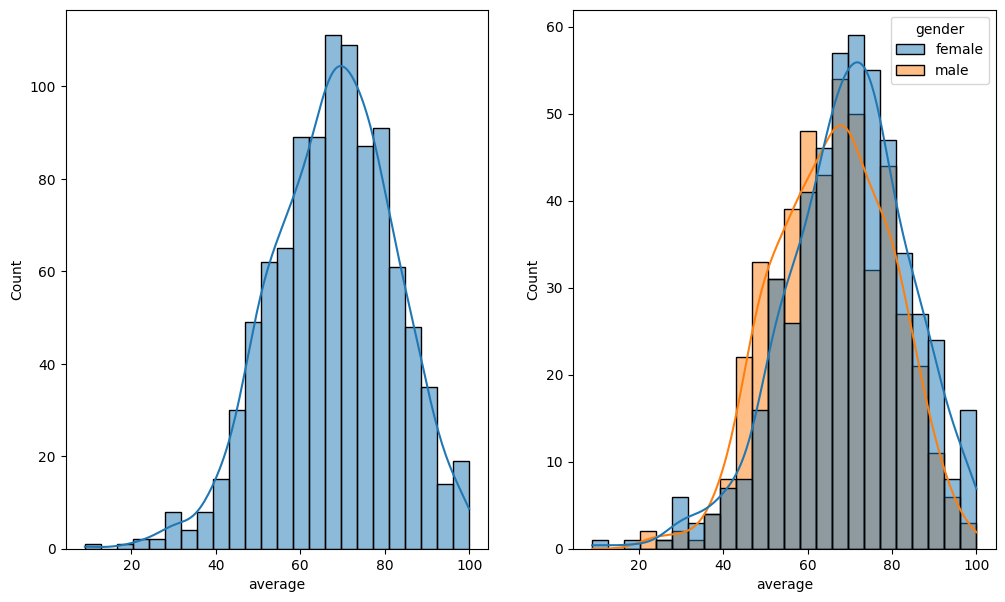

In [42]:
#Average Marks distribution wrt gender
fig, axs = plt.subplots(1, 2, figsize=(12,7))
plt.subplot(121)
sns.histplot(data =df, x='average', kde=True)
plt.subplot(122)
sns.histplot(data =df, x='average', kde=True, hue = 'gender')

<Axes: xlabel='total_score', ylabel='Count'>

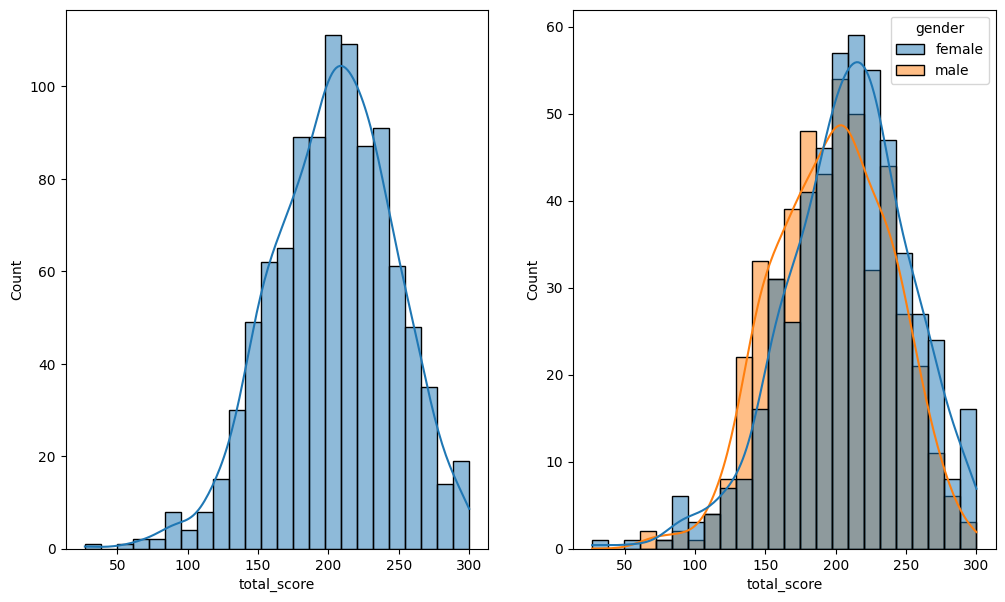

In [44]:
#Total Marks distribution wrt gender
fig, axs = plt.subplots(1, 2, figsize=(12,7))
plt.subplot(121)
sns.histplot(data =df, x='total_score', kde=True)
plt.subplot(122)
sns.histplot(data =df, x='total_score', kde=True, hue = 'gender')

females have performed well than males.

<Axes: xlabel='average', ylabel='Count'>

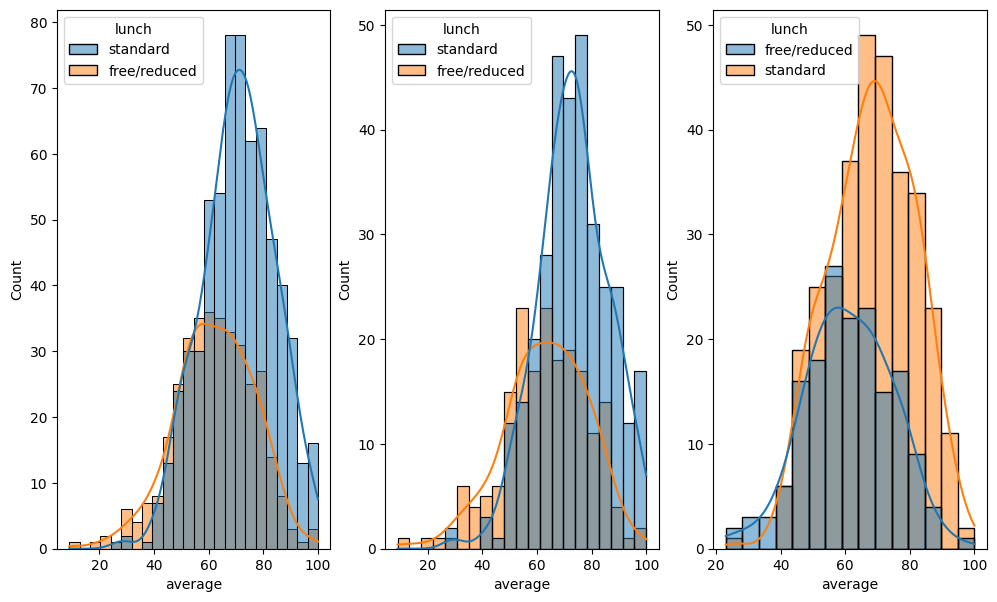

In [49]:
fig, axs = plt.subplots(1, 3, figsize=(12,7))
plt.subplot(131)
sns.histplot(data =df, x='average', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data =df[df['gender']=='female'], x='average', kde=True, hue = 'lunch')
plt.subplot(133)
sns.histplot(data =df[df['gender']=='male'], x='average', kde=True, hue = 'lunch')

Both male and female are performing well in exams with standard lunch

<Axes: xlabel='average', ylabel='Count'>

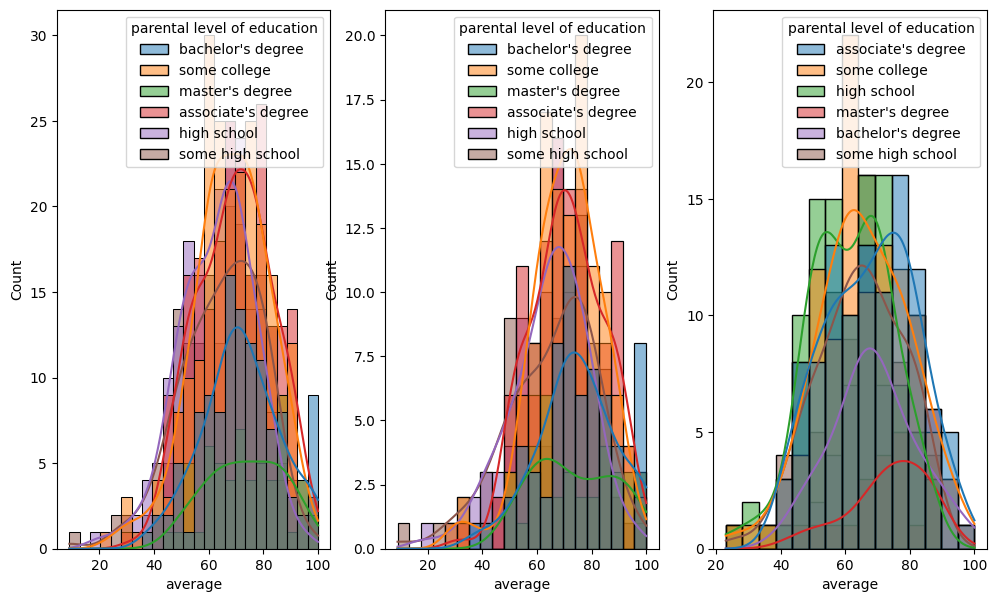

In [50]:
fig, axs = plt.subplots(1, 3, figsize=(12,7))
plt.subplot(131)
sns.histplot(data =df, x='average', kde=True, hue='parental level of education')
plt.subplot(132)
sns.histplot(data =df[df['gender']=='female'], x='average', kde=True, hue = 'parental level of education')
plt.subplot(133)
sns.histplot(data =df[df['gender']=='male'], x='average', kde=True, hue = 'parental level of education')

In general parent's education don't help student perform well in exam.

2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

3rd plot we can see there is no effect of parent's education on female students.

<Axes: xlabel='average', ylabel='Count'>

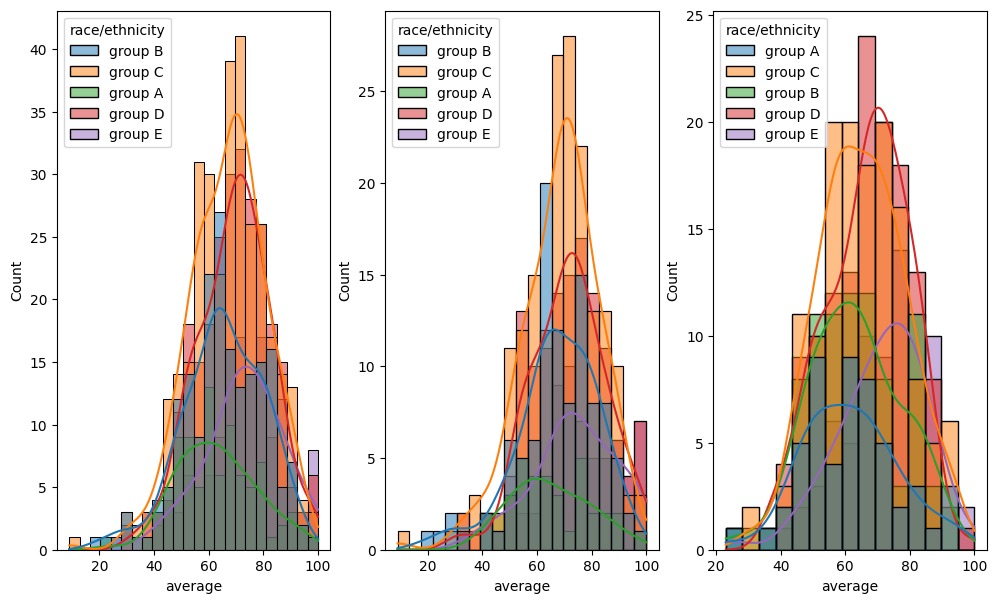

In [53]:
fig, axs = plt.subplots(1, 3, figsize=(12,7))
plt.subplot(131)
sns.histplot(data =df, x='average', kde=True, hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data =df[df['gender']=='female'], x='average', kde=True, hue = 'race/ethnicity')
plt.subplot(133)
sns.histplot(data =df[df['gender']=='male'], x='average', kde=True, hue = 'race/ethnicity')

Group A and Group B students have not performed well, both male and female

<Axes: xlabel='average', ylabel='Count'>

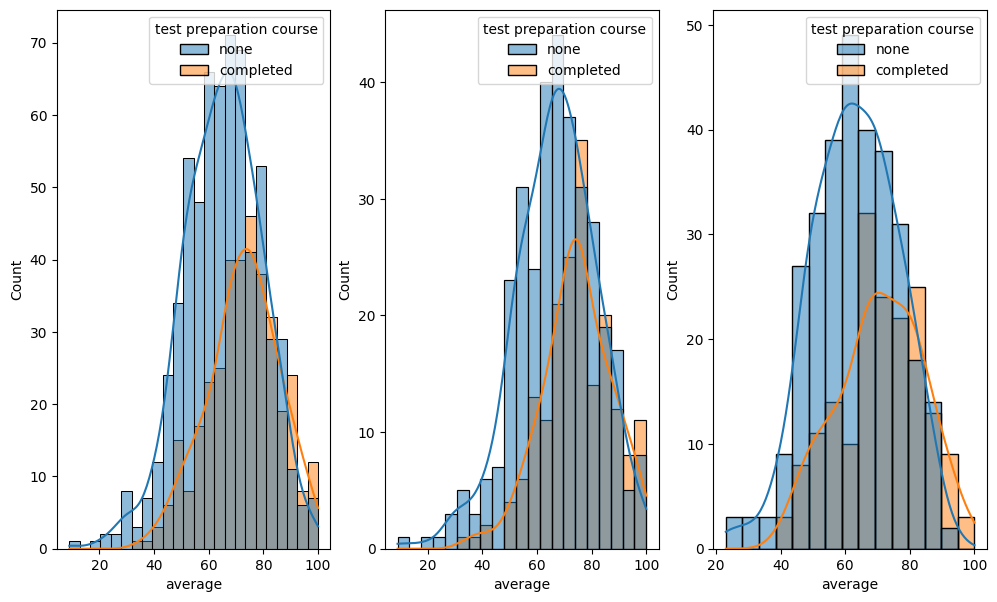

In [70]:
fig, axs = plt.subplots(1, 3, figsize=(12,7))
plt.subplot(131)
sns.histplot(data =df, x='average', kde=True, hue='test preparation course')
plt.subplot(132)
sns.histplot(data =df[df['gender']=='female'], x='average', kde=True, hue = 'test preparation course')
plt.subplot(133)
sns.histplot(data =df[df['gender']=='male'], x='average', kde=True, hue = 'test preparation course')

We can see that people with preparation course have performed relatively better.

<Axes: title={'center': 'Writing Scores'}, ylabel='writing score'>

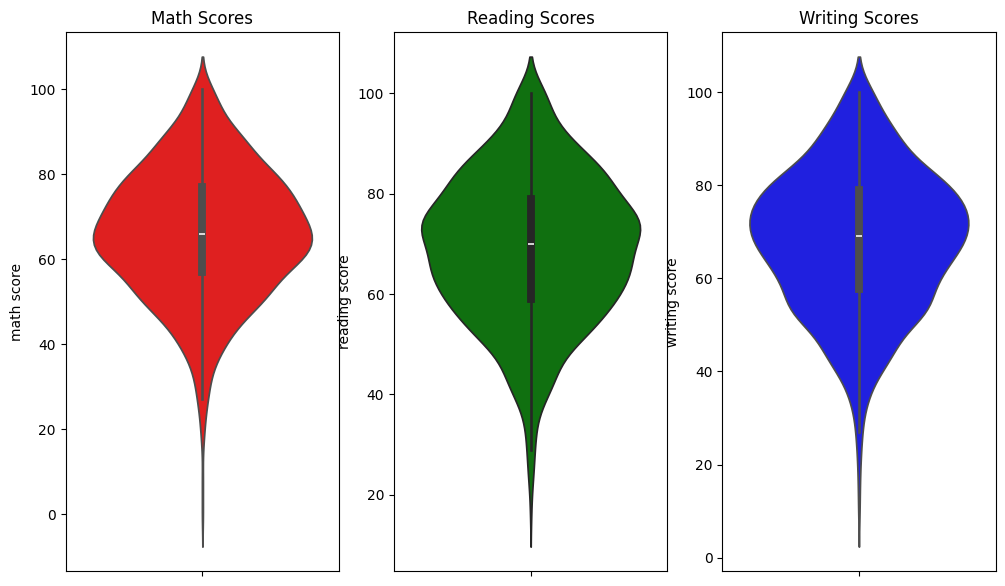

In [58]:
plt.figure(figsize=(12,7))
plt.subplot(1,3,1)
plt.title('Math Scores')
sns.violinplot(y='math score', data=df, color='red')
plt.subplot(1,3,2)
plt.title('Reading Scores')
sns.violinplot(y='reading score', data=df, color='green')
plt.subplot(1,3,3)
plt.title('Writing Scores')
sns.violinplot(y='writing score', data=df, color='blue')

 Majority students have scores between 60-80 in maths

 While in reading and writing majority have scores in range 50-80

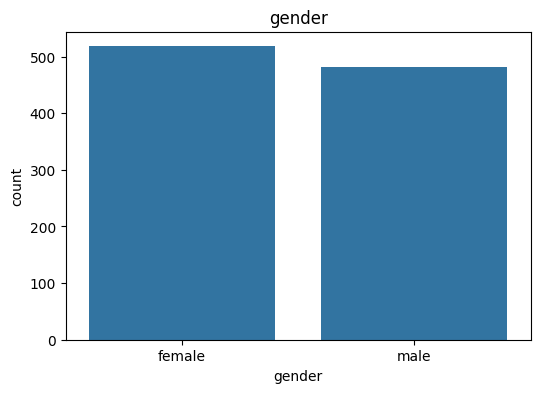

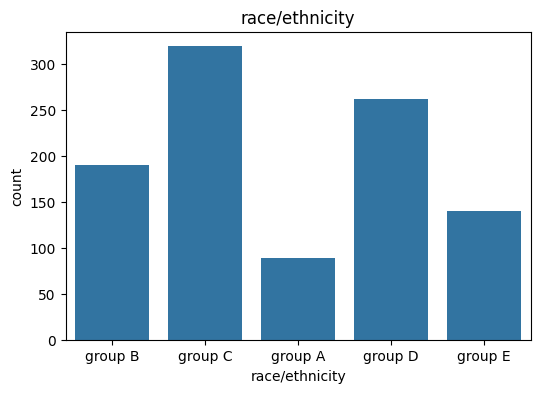

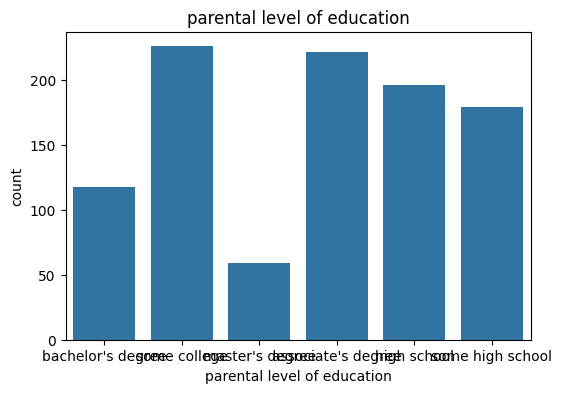

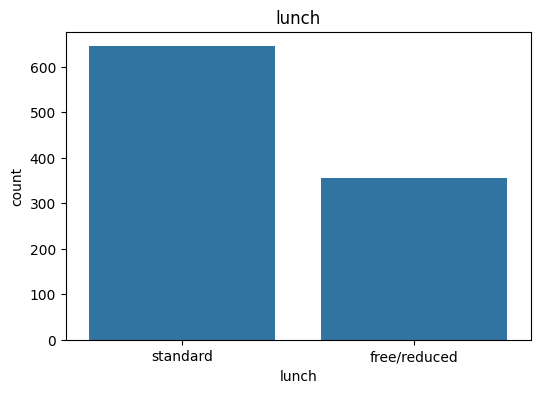

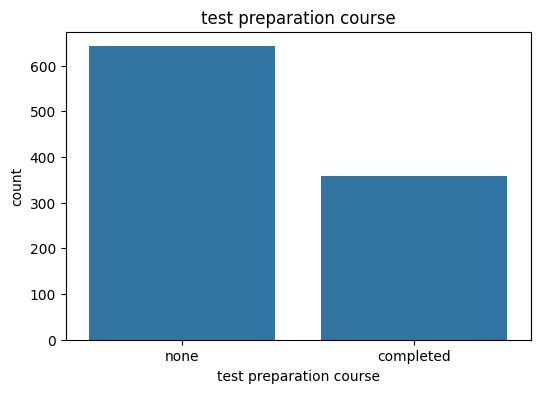

In [67]:
#Analysing categorical features using countplots
for feature in categorical_features:
  plt.figure(figsize=(6,4))
  plt.title(feature)
  sns.countplot(data = df, x = feature)

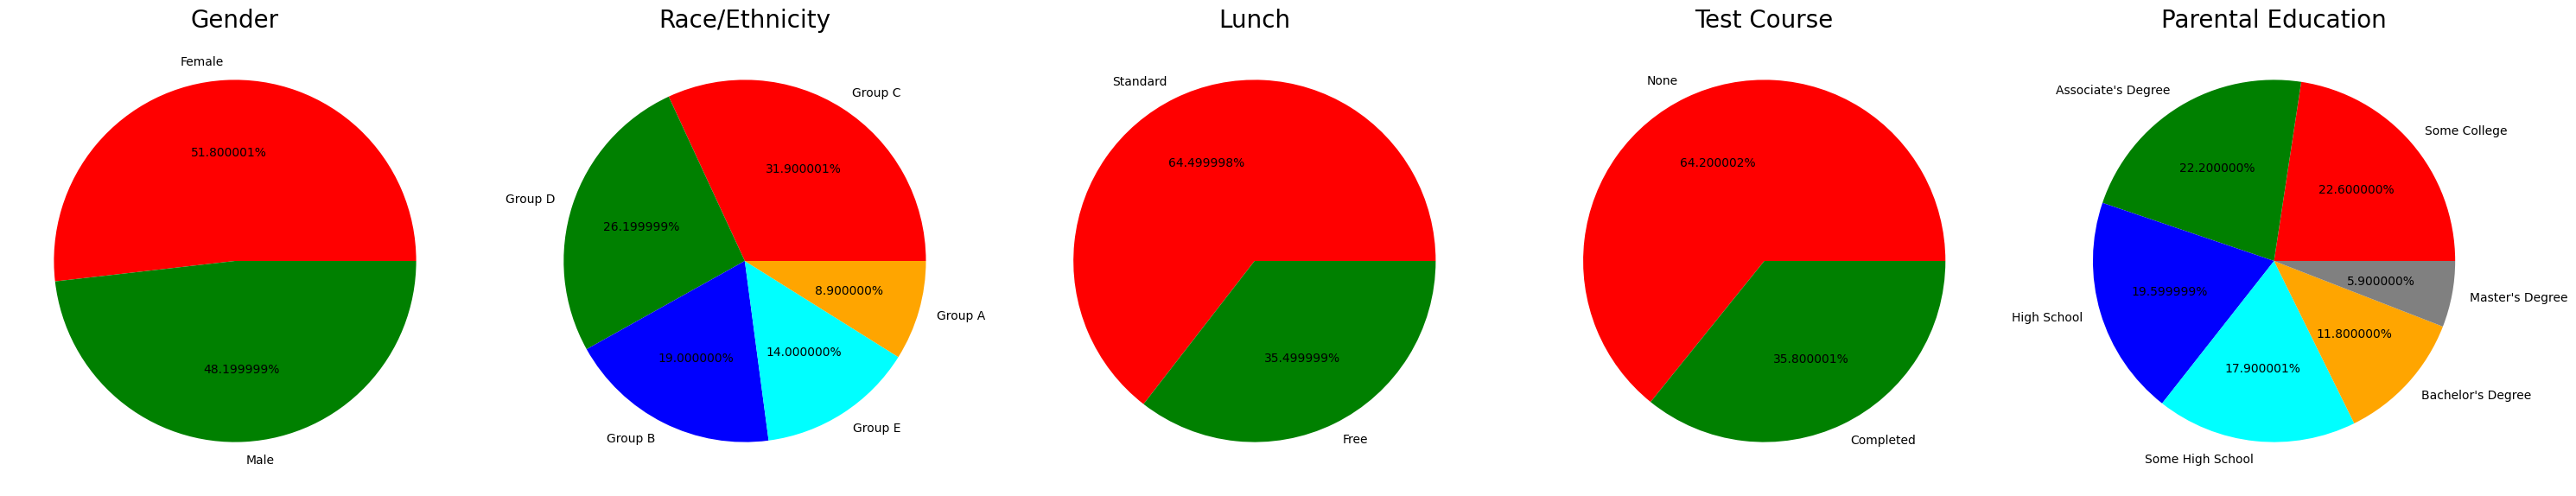

In [68]:
#Using pie plots for multivariate analysis
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Observations:

Almost equal number of male and female students.

Most prominent race is Group C.

Most students have standard lunch.

Most students have not enrolled in any test course.

Most parents with 'some college' level education followed by 'Associate Degrees'


#Feature distribution and impact on performance

---



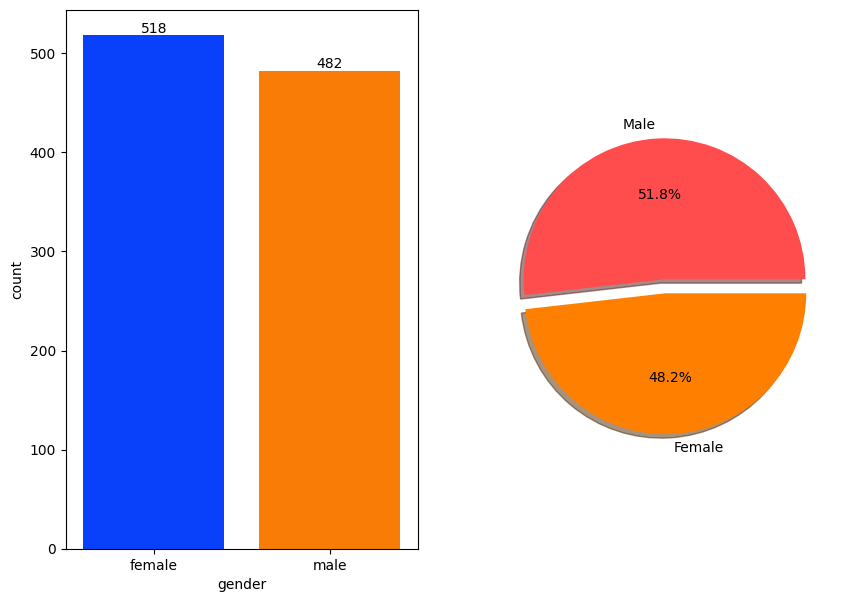

In [73]:
#Gender
f,ax=plt.subplots(1,2,figsize=(10,7))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

<Axes: xlabel='math score', ylabel='Count'>

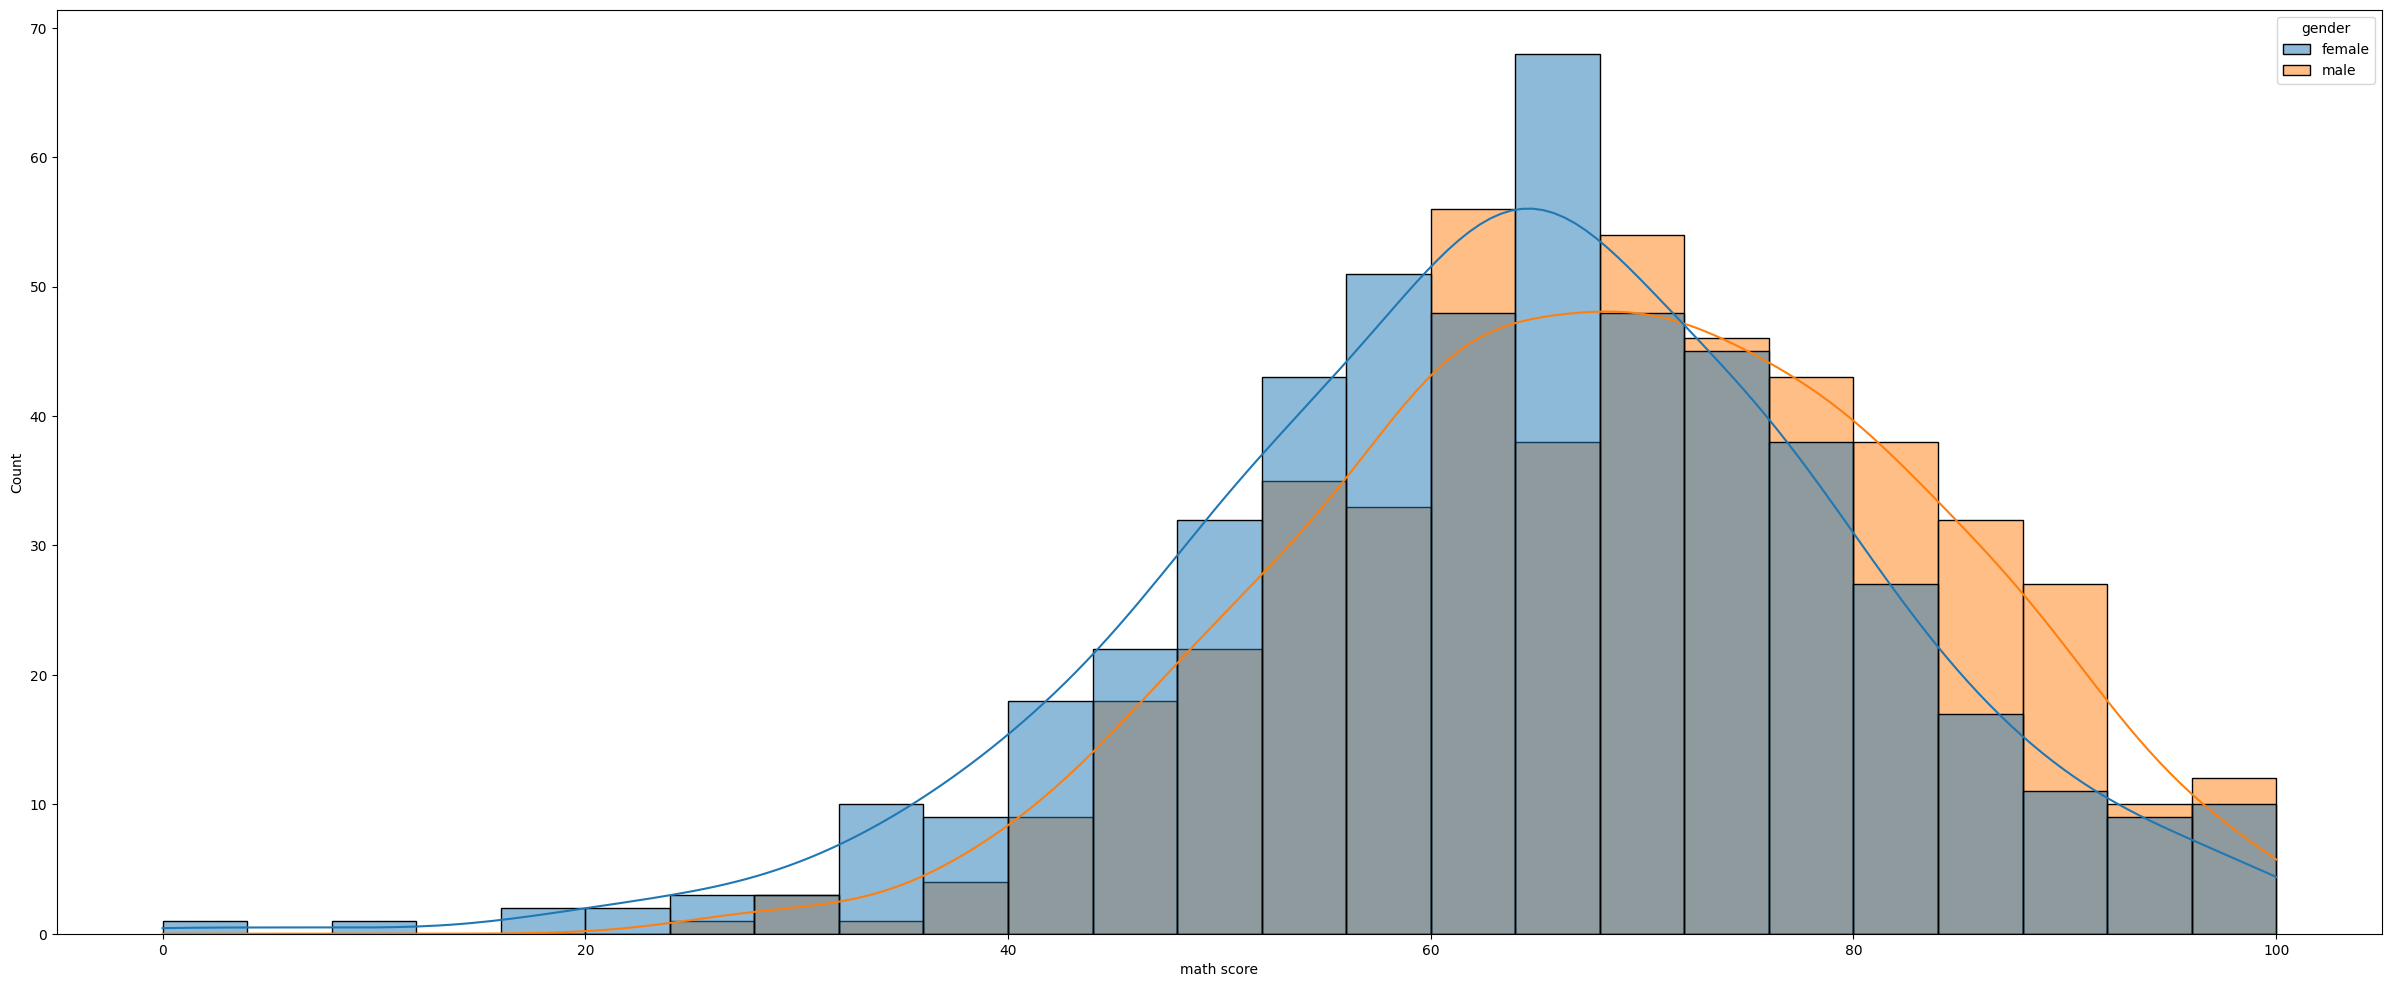

In [86]:
sns.histplot(data=df, x='math score', hue = 'gender',kde=True )

On an average females have a better overall score than men whereas males have scored higher in Maths

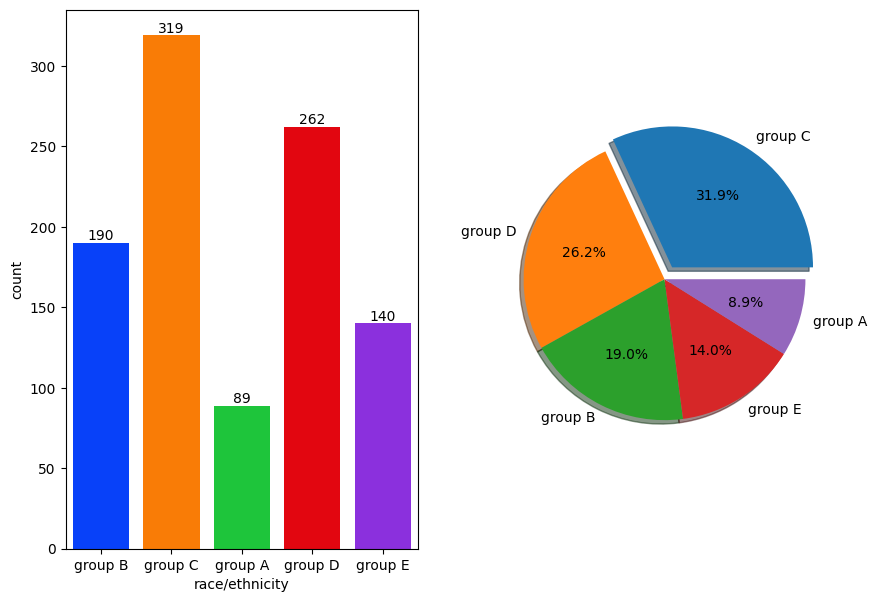

In [91]:
#race/ethnicity
f,ax=plt.subplots(1,2,figsize=(10,7))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)

plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

<Axes: title={'center': 'race/ethnicity vs writing score'}, xlabel='writing score', ylabel='Count'>

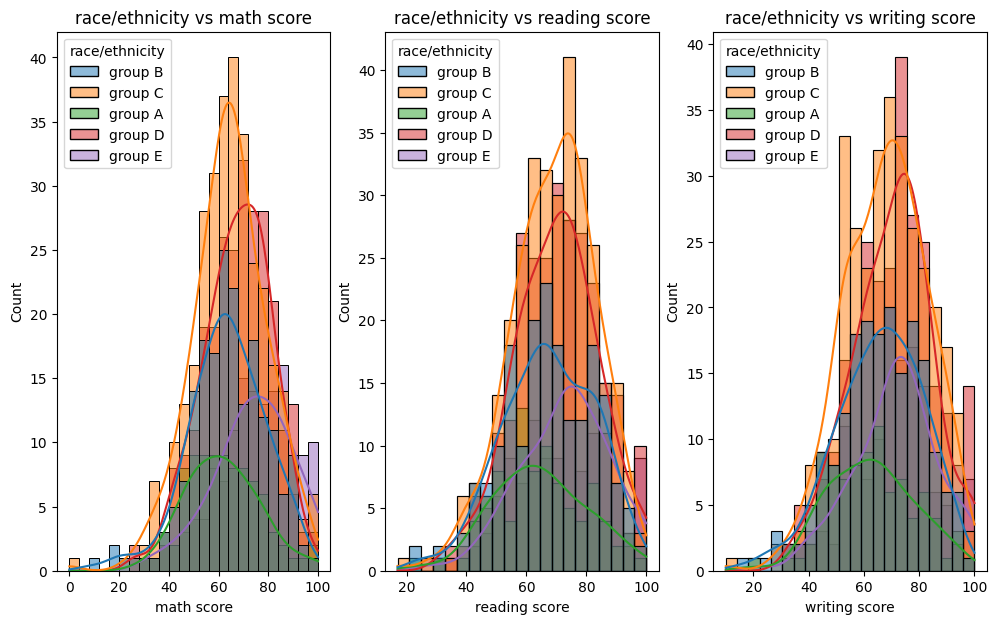

In [95]:
plt.subplots(1,3,figsize=(12,7))

plt.subplot(131)
plt.title('race/ethnicity vs math score')
sns.histplot(data=df, x='math score', hue = 'race/ethnicity',kde=True )
plt.subplot(132)
plt.title('race/ethnicity vs reading score')
sns.histplot(data=df, x='reading score', hue = 'race/ethnicity',kde=True )
plt.subplot(133)
plt.title('race/ethnicity vs writing score')
sns.histplot(data=df, x='writing score', hue = 'race/ethnicity',kde=True )


Group E students have scored the highest marks.

Group A students have scored the lowest marks.

Students from a lower Socioeconomic status have a lower avg in all course subjects

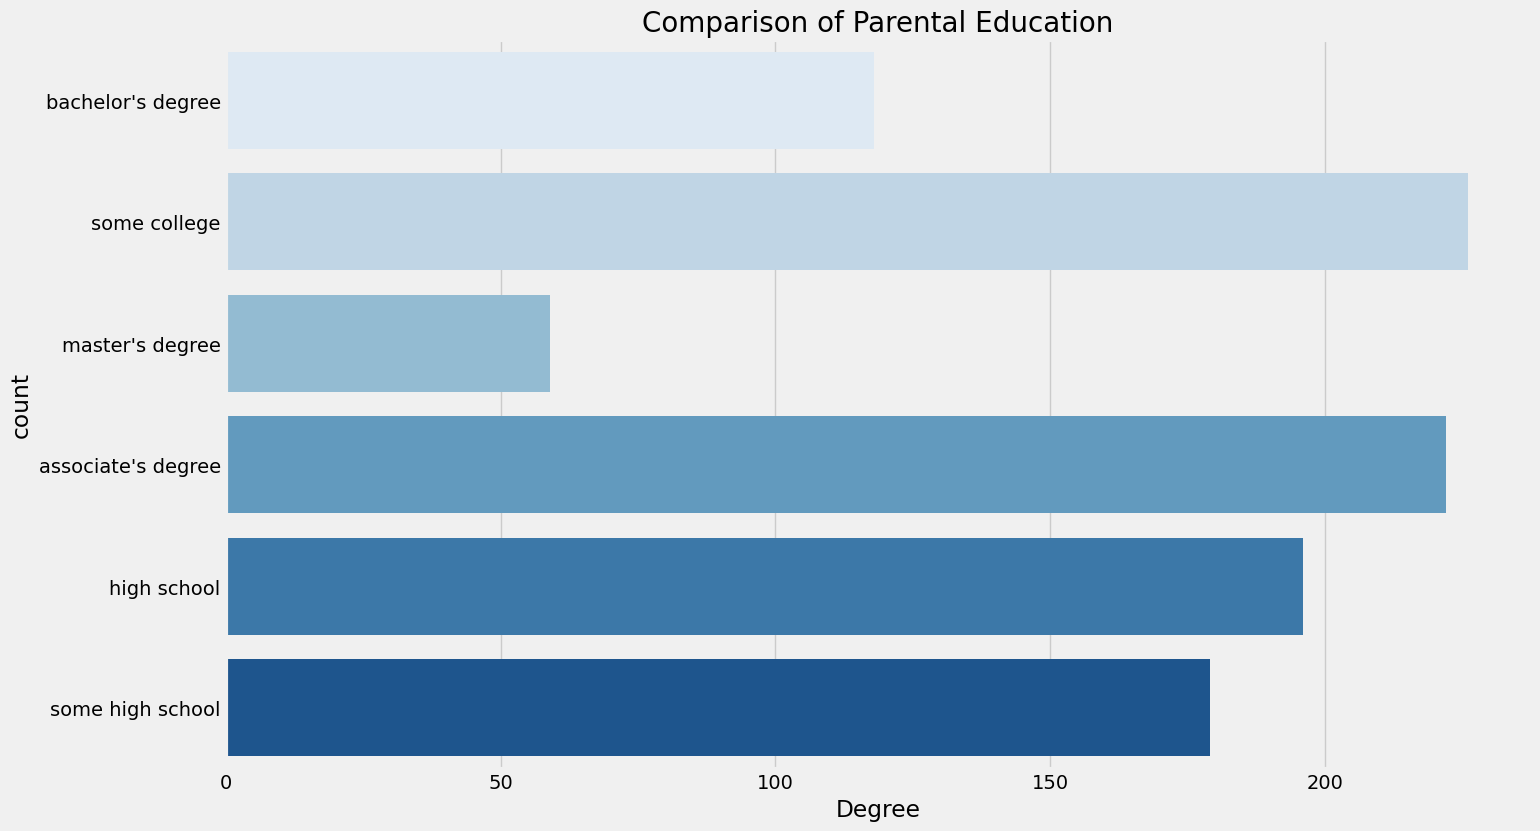

In [96]:
#Parental Education
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

<Axes: title={'center': 'parental level of education vs writing score'}, xlabel='writing score', ylabel='Count'>

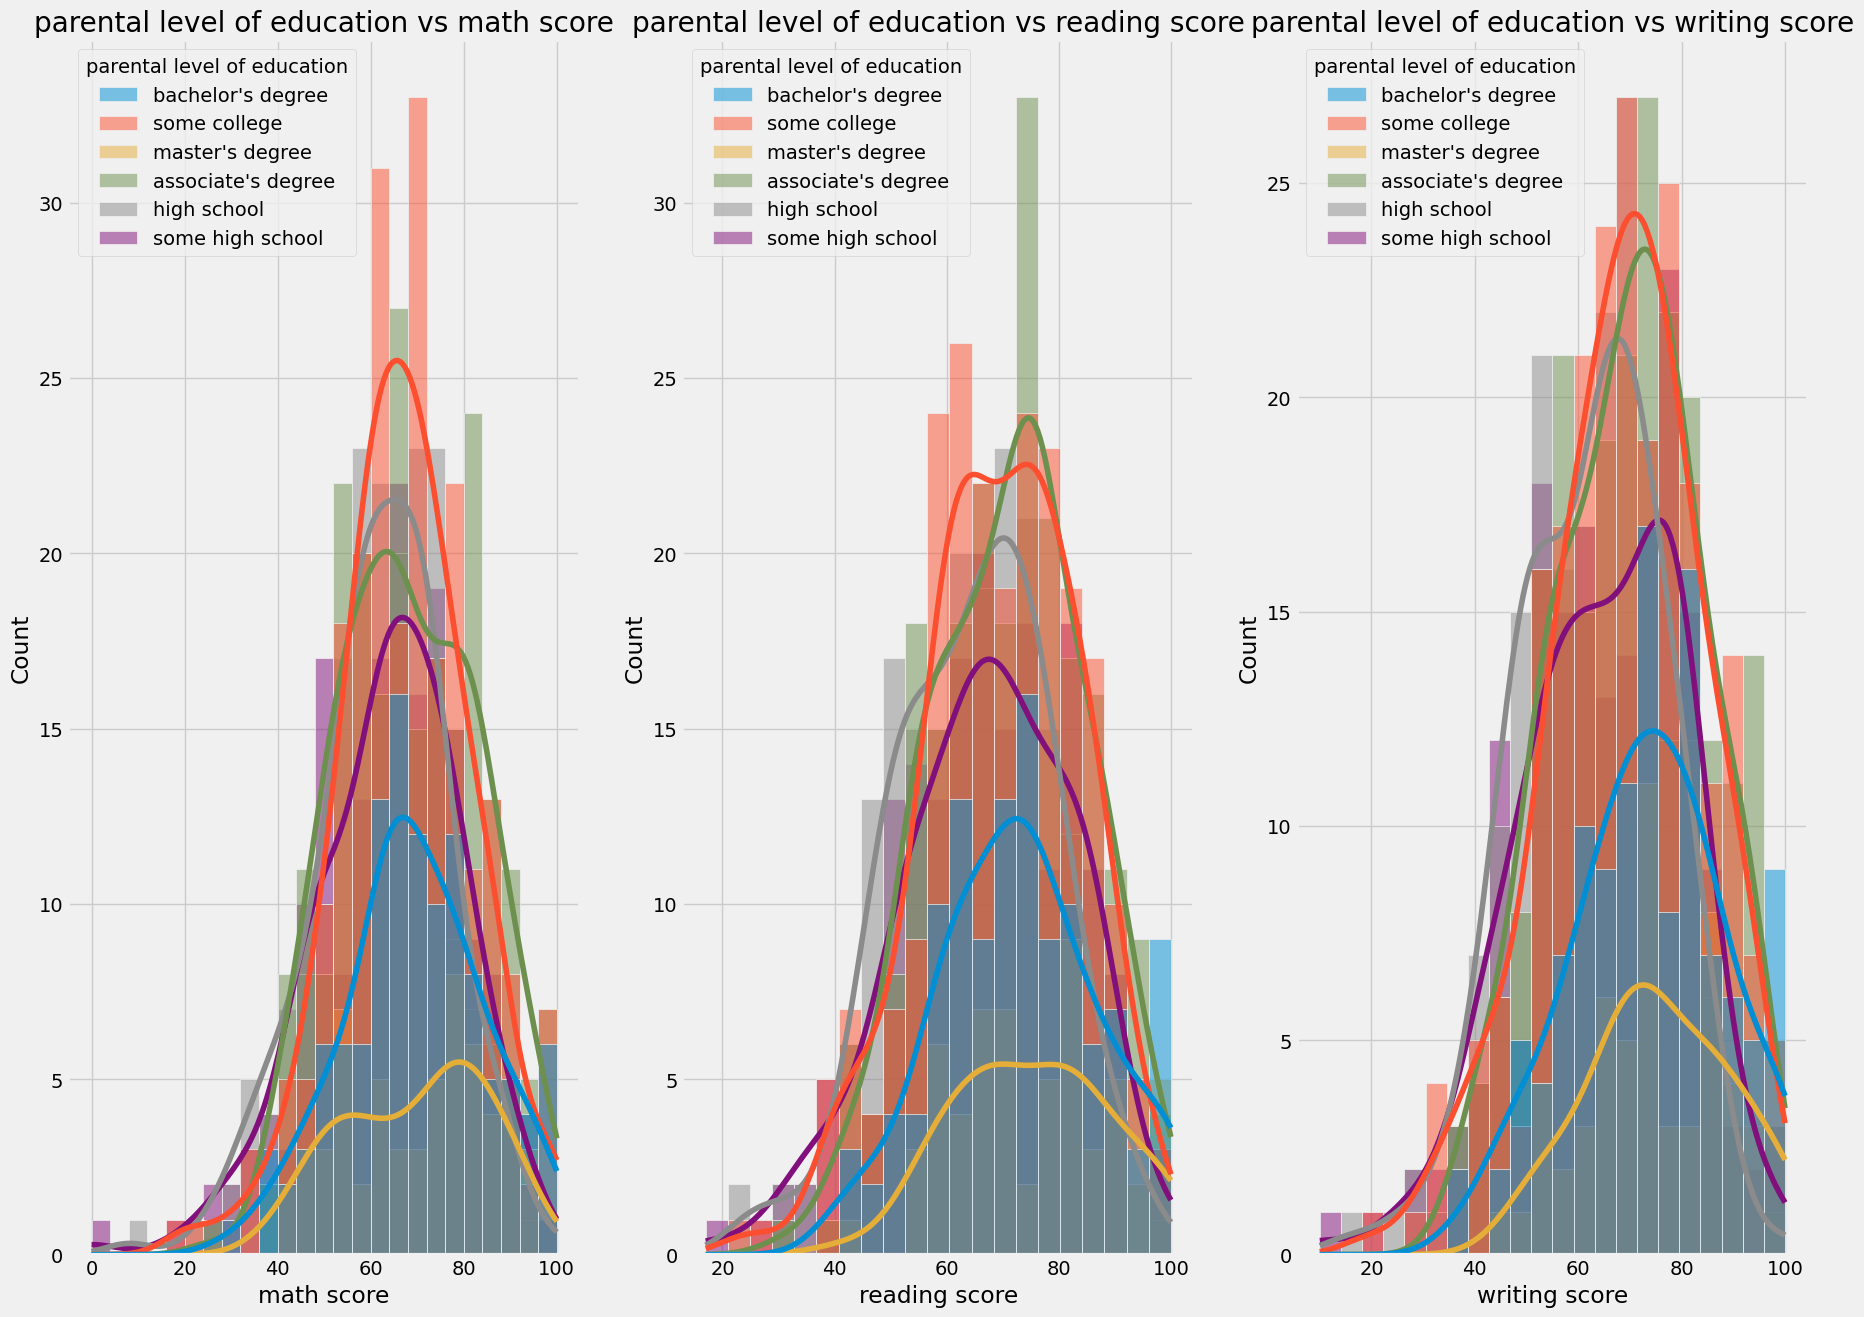

In [101]:
plt.subplots(1,3,figsize=(20,15))

plt.subplot(131)
plt.title('parental level of education vs math score')
sns.histplot(data=df, x='math score', hue = 'parental level of education',kde=True )
plt.subplot(132)
plt.title('parental level of education vs reading score')
sns.histplot(data=df, x='reading score', hue = 'parental level of education',kde=True )
plt.subplot(133)
plt.title('parental level of education vs writing score')
sns.histplot(data=df, x='writing score', hue = 'parental level of education',kde=True )

Children of parents with masters and bachelors have high scores

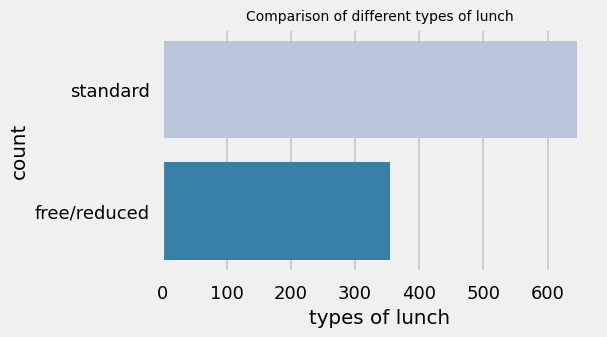

In [110]:
#lunch
plt.figure(figsize=(5,3))
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 10, fontsize = 10)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

<Axes: title={'center': 'lunch vs writing score'}, xlabel='writing score', ylabel='Count'>

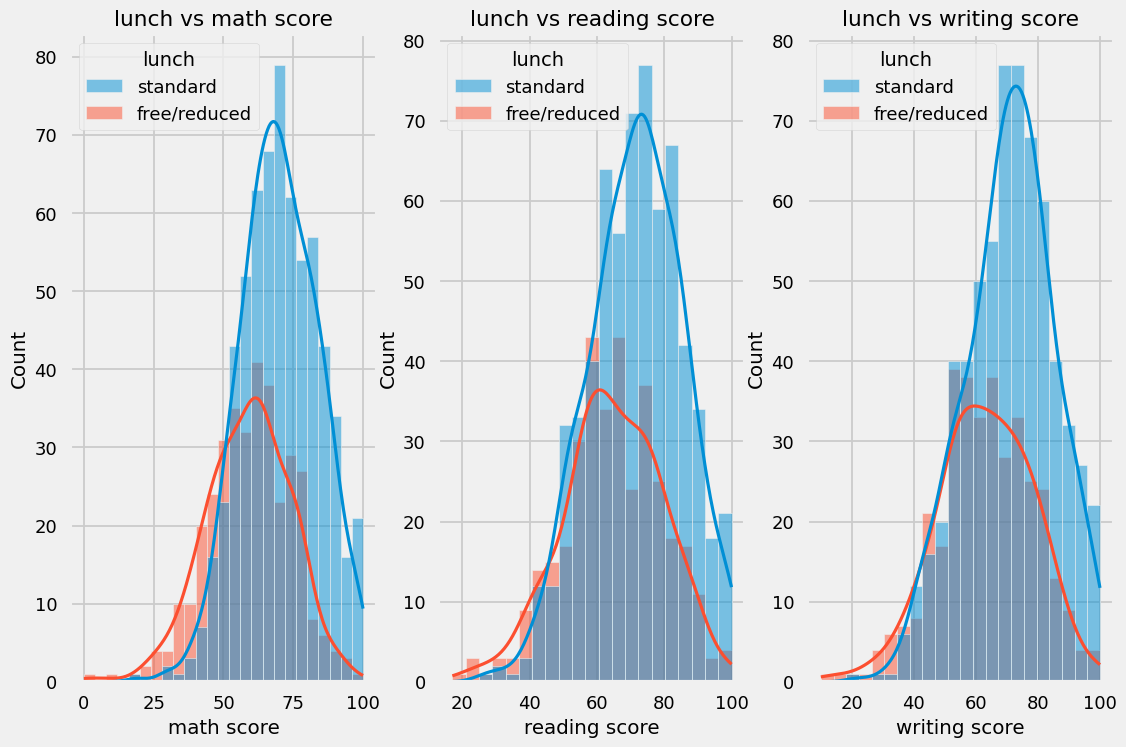

In [114]:
plt.subplots(1,3,figsize=(12,8))

plt.subplot(131)
plt.title('lunch vs math score')
sns.histplot(data=df, x='math score', hue = 'lunch',kde=True )
plt.subplot(132)
plt.title('lunch vs reading score')
sns.histplot(data=df, x='reading score', hue = 'lunch',kde=True )
plt.subplot(133)
plt.title('lunch vs writing score')
sns.histplot(data=df, x='writing score', hue = 'lunch',kde=True )

Students being served Standard lunch was more than free lunch

Students who get Standard Lunch tend to perform better than students who got free/reduced lunch


In [116]:
#Test Preparation Course

<Axes: title={'center': 'test preparation course vs writing score'}, xlabel='writing score', ylabel='Count'>

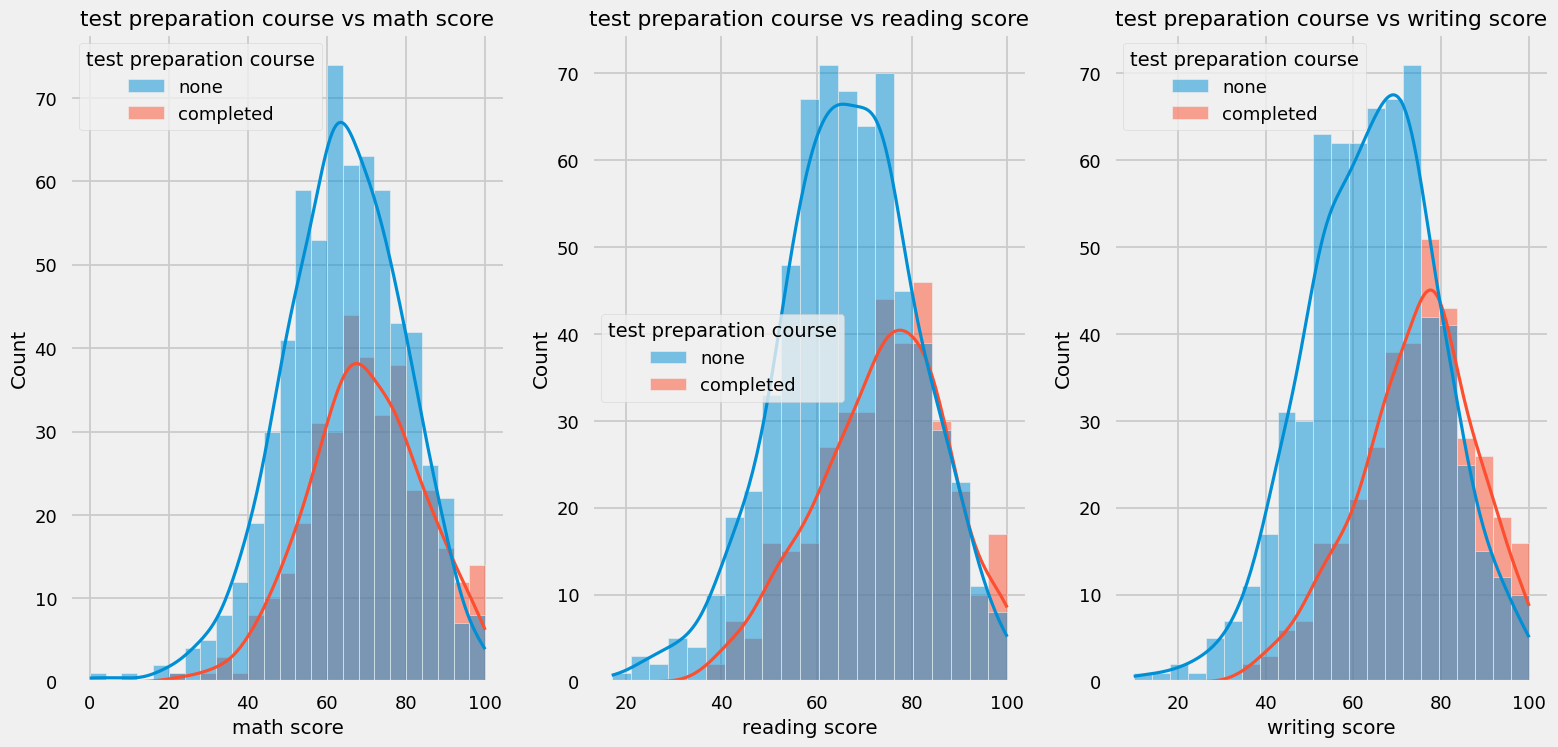

In [120]:
plt.subplots(1,3,figsize=(17,8))

plt.subplot(131)
plt.title('test preparation course vs math score')
sns.histplot(data=df, x='math score', hue = 'test preparation course',kde=True )
plt.subplot(132)
plt.title('test preparation course vs reading score')
sns.histplot(data=df, x='reading score', hue = 'test preparation course',kde=True )
plt.subplot(133)
plt.title('test preparation course vs writing score')
sns.histplot(data=df, x='writing score', hue = 'test preparation course',kde=True )


Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#Checking Outliers

<Axes: title={'center': 'Average Scores'}, ylabel='average'>

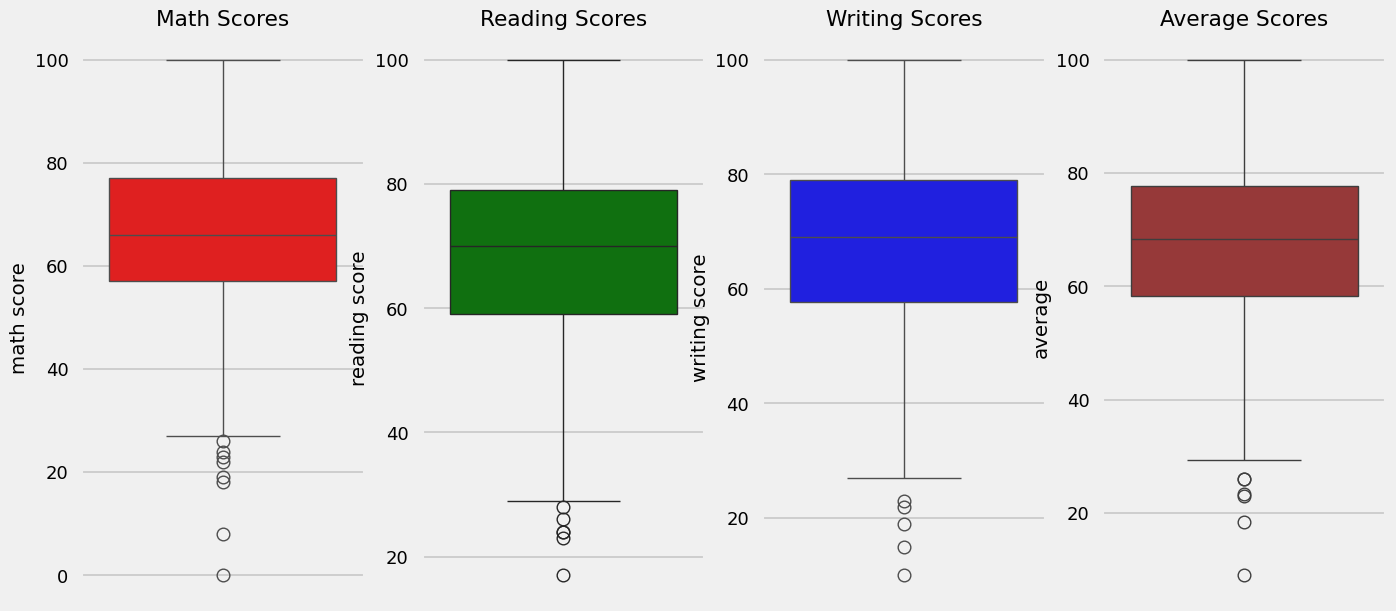

In [125]:
plt.figure(figsize=(15,7))
plt.subplot(1,4,1)
plt.title('Math Scores')
sns.boxplot(y='math score', data=df, color='red')
plt.subplot(1,4,2)
plt.title('Reading Scores')
sns.boxplot(y='reading score', data=df, color='green')
plt.subplot(1,4,3)
plt.title('Writing Scores')
sns.boxplot(y='writing score', data=df, color='blue')
plt.subplot(1,4,4)
plt.title('Average Scores')
sns.boxplot(y='average', data=df, color='brown')

#Pair plots for multi variate analysis

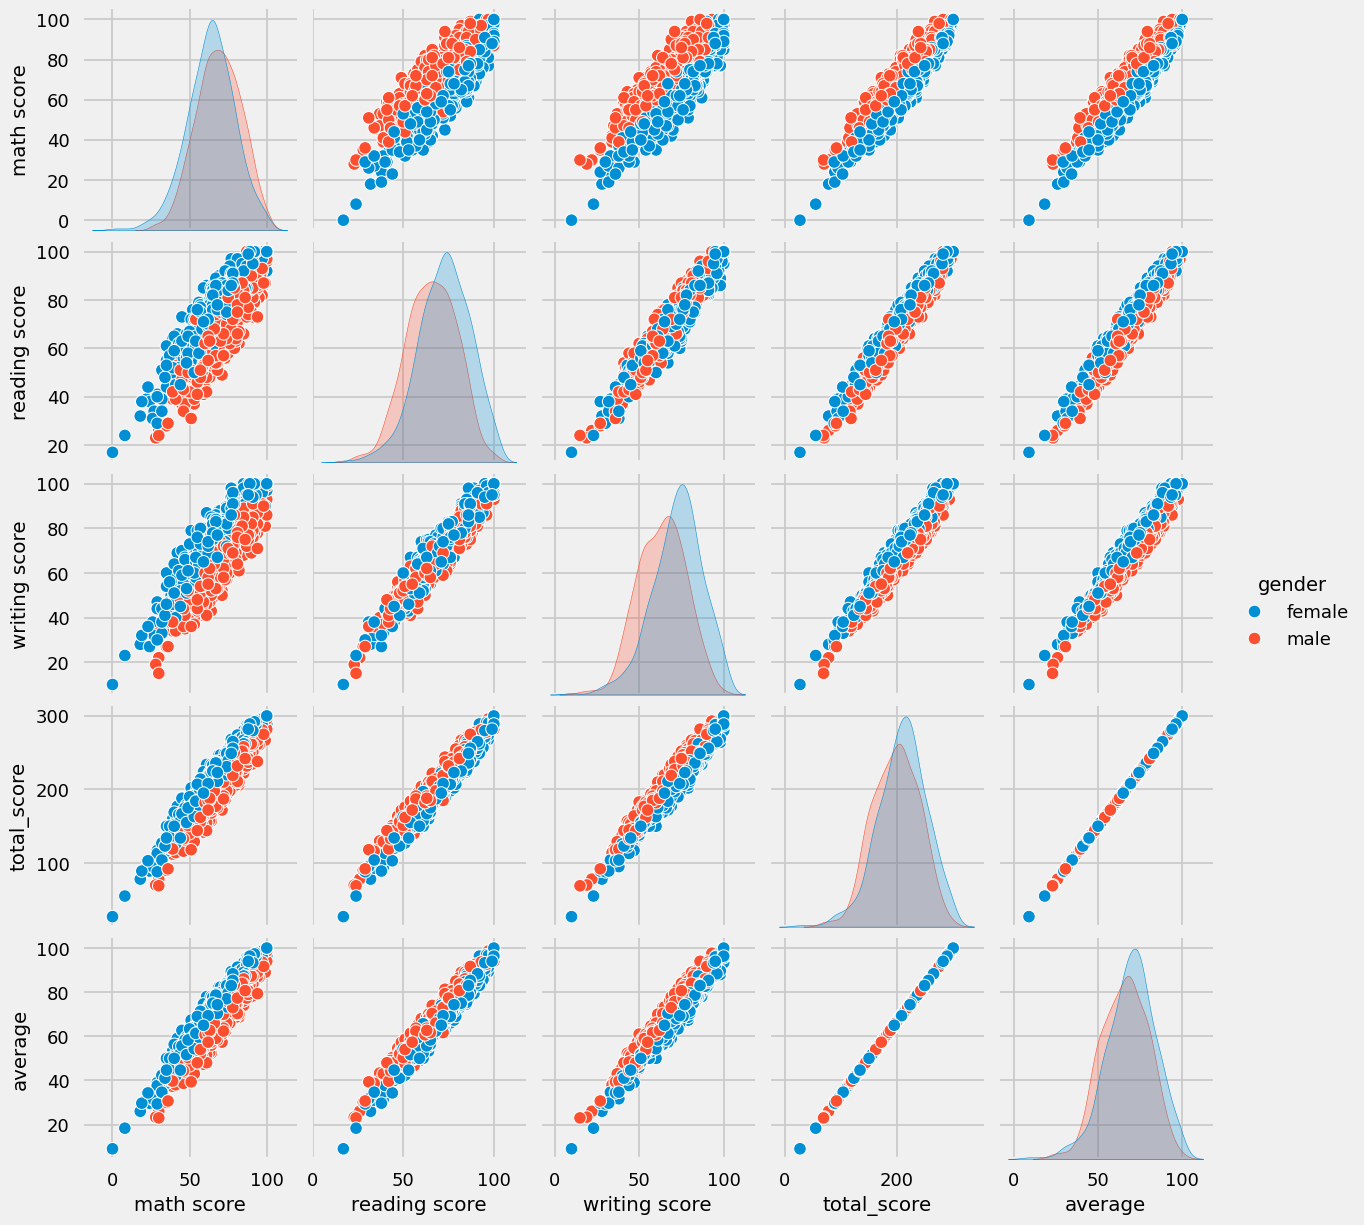

In [126]:
sns.pairplot(df, hue='gender')
plt.show()

From the above plot it is clear that all the scores increase linearly with each other.
